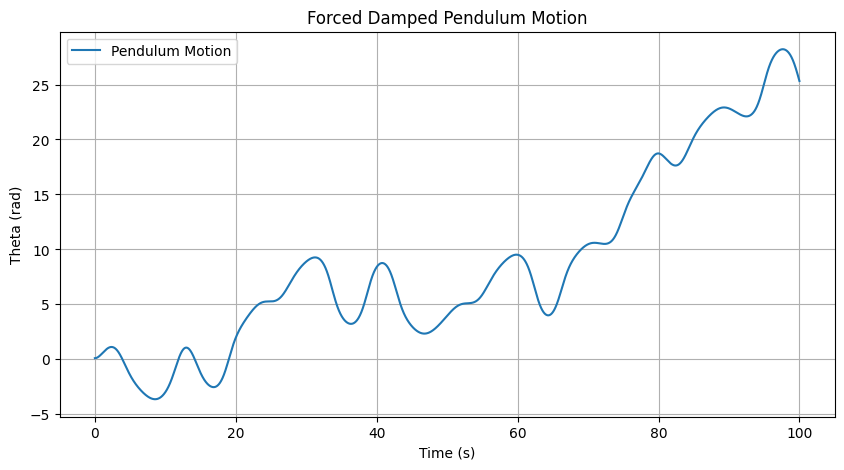

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the forced damped pendulum equations
def forced_damped_pendulum(t, y, b, c, A, omega):
    theta, omega_theta = y  # y = [theta, angular velocity]
    dtheta_dt = omega_theta
    domega_dt = -b * omega_theta - np.sin(theta) + A * np.cos(omega * t)  # Equation of motion
    return [dtheta_dt, domega_dt]

# Simulation parameters
b = 0.5   # Damping coefficient
c = 1.0   # Gravitational constant (normalized)
A = 1.2   # Driving force amplitude
omega = 2/3  # Driving frequency
t_span = (0, 100)  # Time span
t_eval = np.linspace(0, 100, 10000)  # Time steps
y0 = [0.1, 0]  # Initial conditions (small angle)

# Solve the differential equation using Runge-Kutta method
solution = solve_ivp(forced_damped_pendulum, t_span, y0, t_eval=t_eval, args=(b, c, A, omega))

# Extract theta and time
t = solution.t
theta = solution.y[0]

# Plot the pendulum motion
plt.figure(figsize=(10, 5))
plt.plot(t, theta, label="Pendulum Motion")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title("Forced Damped Pendulum Motion")
plt.legend()
plt.grid()
plt.show()
